In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

predictions_path = r"../src/predictions.csv"
dataset_path = r"../../data/merged_dataset.csv"

In [18]:
# Metadata
df1 = pd.read_csv(dataset_path, encoding='latin-1')
df1

,filename,pit,sex,length,spawning,date,dataset,recap,Period,dayseq,area,crypto,skade
0,201506_l_0.jpg,201506,f,137.0,0.0,2019-10-29,LabMain,NaN,Oct,NaN,NaN,NaN,NaN
1,201506_l_1.jpg,201506,f,138.0,0.0,2020-05-02,LabMain,NaN,May,NaN,NaN,NaN,NaN
2,201506_r_0.jpg,201506,f,137.0,0.0,2019-10-29,LabMain,NaN,Oct,NaN,NaN,NaN,NaN
3,201506_r_1.jpg,201506,f,138.0,0.0,2020-05-02,LabMain,NaN,May,NaN,NaN,NaN,NaN
4,201934_r_0.jpg,201934,m,220.0,NaN,2019-10-01,Pier,NaN,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3489,433982_r_4.jpg,433982,f,147.0,0.0,2019-10-28 00:00:00,quad,NaN,NaN,NaN,NaN,NaN,NaN
3490,433982_r_5.jpg,433982,f,147.0,0.0,2019-10-28 00:00:00,quad,NaN,NaN,NaN,NaN,NaN,NaN
3491,433982_r_6.jpg,433982,f,147.0,0.0,2019-10-28 00:00:00,quad,NaN,NaN,NaN,NaN,NaN,NaN
3492,433982_r_7.jpg,433982,f,147.0,0.0,2019-10-28 00:00:00,quad,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Predictions
df2 = pd.read_csv(predictions_path, encoding='utf-8')
df2 = df2.iloc[:,np.r_[0,-5:-1]]
df2

,filename,support_filename,query_filename,correct_filename,rank
0,201506_l_0.jpg,433867_l_1.jpg,201506_l_0.jpg,201506_l_6.jpg,5
1,201506_l_2.jpg,420885_l_2.jpg,201506_l_2.jpg,201506_l_4.jpg,7
2,201506_l_3.jpg,420885_l_2.jpg,201506_l_3.jpg,201506_l_4.jpg,2
3,201506_l_5.jpg,201506_l_4.jpg,201506_l_5.jpg,201506_l_4.jpg,1
4,201506_r_2.jpg,421660_r_3.jpg,201506_r_2.jpg,201506_r_4.jpg,3
...,...,...,...,...,...
938,65843_r_1.jpg,443225_r_1.jpg,65843_r_1.jpg,65843_r_0.jpg,10
939,67201_l_2.jpg,67201_l_1.jpg,67201_l_2.jpg,67201_l_1.jpg,1
940,67510_l_1.jpg,65722_l_0.jpg,67510_l_1.jpg,67510_l_0.jpg,6
941,67908_l_1.jpg,67908_l_0.jpg,67908_l_1.jpg,67908_l_0.jpg,1


In [54]:
# Metadata and predictions combined,
df = df1.merge(df2, on='filename', how='outer')
df["date"] = pd.to_datetime(df["date"])
df

,filename,pit,sex,length,spawning,date,dataset,recap,Period,dayseq,area,crypto,skade,support_filename,query_filename,correct_filename,rank
0,201506_l_0.jpg,201506,f,137.0,0.0,2019-10-29,LabMain,NaN,Oct,NaN,NaN,NaN,NaN,433867_l_1.jpg,201506_l_0.jpg,201506_l_6.jpg,5.0
1,201506_l_1.jpg,201506,f,138.0,0.0,2020-05-02,LabMain,NaN,May,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201506_r_0.jpg,201506,f,137.0,0.0,2019-10-29,LabMain,NaN,Oct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201506_r_1.jpg,201506,f,138.0,0.0,2020-05-02,LabMain,NaN,May,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201934_r_0.jpg,201934,m,220.0,NaN,2019-10-01,Pier,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3489,433982_r_4.jpg,433982,f,147.0,0.0,2019-10-28,quad,NaN,NaN,NaN,NaN,NaN,NaN,433982_r_7.jpg,433982_r_4.jpg,433982_r_7.jpg,1.0
3490,433982_r_5.jpg,433982,f,147.0,0.0,2019-10-28,quad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3491,433982_r_6.jpg,433982,f,147.0,0.0,2019-10-28,quad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3492,433982_r_7.jpg,433982,f,147.0,0.0,2019-10-28,quad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df.to_csv("dataset_w_predictions.csv", index=False)

In [55]:
df_drop = df.dropna(subset=["query_filename"])
df_drop

,filename,pit,sex,length,spawning,date,dataset,recap,Period,dayseq,area,crypto,skade,support_filename,query_filename,correct_filename,rank
0,201506_l_0.jpg,201506,f,137.0,0.0,2019-10-29,LabMain,NaN,Oct,NaN,NaN,NaN,NaN,433867_l_1.jpg,201506_l_0.jpg,201506_l_6.jpg,5.0
13,204295_r_1.jpg,204295,m,149.0,0.0,2018-09-06,FieldMain,1.0,4,614.0,L,NaN,NaN,430999_r_2.jpg,204295_r_1.jpg,204295_r_0.jpg,67.0
17,204942_r_1.jpg,204942,f,175.0,0.0,2020-08-30,FieldMain,1.0,11,1338.0,S,NaN,NaN,431065_r_0.jpg,204942_r_1.jpg,204942_r_0.jpg,47.0
20,209127_r_0.jpg,209127,f,181.0,2.0,2020-06-29,FieldMain,1.0,10,1276.0,S,NaN,NaN,443592_r_0.jpg,209127_r_0.jpg,209127_r_1.jpg,2.0
25,209526_r_0.jpg,209526,f,157.0,0.0,2020-06-30,FieldMain,1.0,10,1277.0,S,2.0,NaN,420268_r_0.jpg,209526_r_0.jpg,209526_r_1.jpg,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3481,433982_l_6.jpg,433982,f,147.0,0.0,2019-10-28,quad,NaN,NaN,NaN,NaN,NaN,NaN,433982_l_7.jpg,433982_l_6.jpg,433982_l_7.jpg,1.0
3486,433982_l_11.jpg,433982,f,147.0,0.0,2019-10-28,quad,NaN,NaN,NaN,NaN,NaN,NaN,433982_l_7.jpg,433982_l_11.jpg,433982_l_7.jpg,1.0
3488,433982_r_3.jpg,433982,f,147.0,0.0,2019-10-28,quad,NaN,NaN,NaN,NaN,NaN,NaN,433982_r_0.jpg,433982_r_3.jpg,433982_r_0.jpg,1.0
3489,433982_r_4.jpg,433982,f,147.0,0.0,2019-10-28,quad,NaN,NaN,NaN,NaN,NaN,NaN,433982_r_7.jpg,433982_r_4.jpg,433982_r_7.jpg,1.0


In [46]:
def evaluate_filter(dframe, filter):
    df_filter = dframe[filter]
    rank_1 = len(df_filter[df_filter["rank"] == 1])
    print(rank_1/len(df_filter))

In [49]:
evaluate_filter(df_drop, df_drop["dataset"] == "quad")

0.7814726840855107


In [50]:
evaluate_filter(df_drop, df_drop["dataset"] != "quad")

0.3620689655172414


In [48]:
evaluate_filter(df_drop, df_drop["sex"] == "m")

0.6013667425968109


In [51]:
evaluate_filter(df_drop, df_drop["sex"] == "f")

0.5147058823529411


In [147]:
results = []

for i, row in df_drop.iterrows():
    correct_row = df[df["filename"] == row["correct_filename"]]
    diff = abs((row["date"] - correct_row["date"]).dt.days.values[0])
    results.append((diff, row["rank"] == 1))

results = sorted(results, key=lambda x: x[0])
x_max = results[-1][0]
results

[(0, False),
 (0, True),
 (0, True),
 (0, True),
 (0, True),
 (0, False),
 (0, True),
 (0, True),
 (0, True),
 (0, False),
 (0, True),
 (0, True),
 (0, False),
 (0, False),
 (0, True),
 (0, False),
 (0, False),
 (0, False),
 (0, False),
 (0, False),
 (0, True),
 (0, False),
 (0, True),
 (0, True),
 (0, True),
 (0, False),
 (0, True),
 (0, True),
 (0, True),
 (0, True),
 (0, True),
 (0, True),
 (0, False),
 (0, True),
 (0, True),
 (0, False),
 (0, False),
 (0, False),
 (0, True),
 (0, False),
 (0, False),
 (0, True),
 (0, True),
 (0, False),
 (0, False),
 (0, True),
 (0, False),
 (0, True),
 (0, True),
 (0, False),
 (0, True),
 (0, True),
 (0, False),
 (0, True),
 (0, False),
 (0, True),
 (0, True),
 (0, False),
 (0, False),
 (0, False),
 (0, True),
 (0, False),
 (0, True),
 (0, True),
 (0, True),
 (0, True),
 (0, False),
 (0, True),
 (0, False),
 (0, True),
 (0, False),
 (0, False),
 (0, True),
 (0, False),
 (0, True),
 (0, True),
 (0, False),
 (0, False),
 (0, True),
 (0, False),
 (0,

In [144]:
y = dict()

last_value = 0
for i in range(len(results)):
    last_value += 1 if results[i][1] else 0
    y[results[i][0]] = last_value

last_value = 0
for i in range(x_max):
    if i in y.keys():
        last_value = y[i]
    else:
        y[i] = last_value

y = dict(sorted(y.items()))
y

{0: 348,
 1: 355,
 2: 368,
 3: 371,
 4: 377,
 5: 377,
 6: 385,
 7: 386,
 8: 386,
 9: 386,
 10: 386,
 11: 386,
 12: 386,
 13: 386,
 14: 386,
 15: 386,
 16: 386,
 17: 386,
 18: 386,
 19: 387,
 20: 387,
 21: 387,
 22: 387,
 23: 387,
 24: 387,
 25: 387,
 26: 387,
 27: 387,
 28: 387,
 29: 387,
 30: 387,
 31: 387,
 32: 387,
 33: 387,
 34: 387,
 35: 387,
 36: 387,
 37: 387,
 38: 387,
 39: 387,
 40: 387,
 41: 387,
 42: 387,
 43: 387,
 44: 387,
 45: 387,
 46: 387,
 47: 388,
 48: 390,
 49: 391,
 50: 399,
 51: 401,
 52: 402,
 53: 402,
 54: 405,
 55: 405,
 56: 406,
 57: 406,
 58: 406,
 59: 411,
 60: 413,
 61: 414,
 62: 416,
 63: 419,
 64: 420,
 65: 420,
 66: 420,
 67: 421,
 68: 421,
 69: 422,
 70: 422,
 71: 422,
 72: 422,
 73: 422,
 74: 422,
 75: 422,
 76: 422,
 77: 422,
 78: 422,
 79: 422,
 80: 422,
 81: 422,
 82: 422,
 83: 422,
 84: 422,
 85: 422,
 86: 422,
 87: 422,
 88: 422,
 89: 422,
 90: 422,
 91: 422,
 92: 422,
 93: 422,
 94: 422,
 95: 422,
 96: 422,
 97: 422,
 98: 422,
 99: 422,
 100: 422,

Text(0, 0.5, 'cumulative correct')

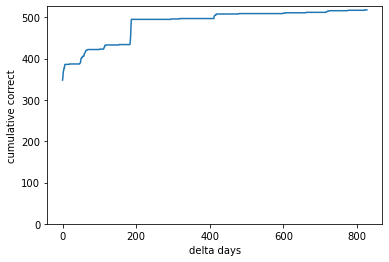

In [164]:
y_max = len(results)

plt.plot(list(y.values()))
plt.ylim(bottom=0)
plt.xlabel("delta days")
plt.ylabel("cumulative correct")

In [155]:
grouped = []

for i, thresh in enumerate(list(range(30, x_max + 30, 30))):
    subset = [sub for sub in results if sub[0] < thresh and sub[0] >= thresh - 30]
    count = 0
    for sub in subset:
        count += 1 if sub[1] else 0
    if (len(subset) < 1):
        #grouped.append((i, 0, 0))
        continue
    grouped.append((i, count/len(subset), len(subset)))

index_name = "differanse i måneder (30 dager)"
df_months = pd.DataFrame.from_records(grouped, columns=[index_name, "andel", "antall mulige"], index=index_name)
df_months[df_months["antall mulige"] > 5] 

,andel,antall mulige
differanse i måneder (30 dager),,
0,0.712707,543
1,0.358209,67
2,0.297297,37
3,0.224490,49
6,0.465649,131
13,0.407407,27
17,0.000000,8
20,0.090909,11
21,0.000000,6


In [142]:
subset = [sub for sub in results if sub[0] == 0]
count = 0
for sub in subset:
    count += 1 if sub[1] else 0
        
print(count, count/len(subset), len(subset))

348 0.754880694143167 461
